# Проект e-commerce: вариант 1 

Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 


2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)


3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)


4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 


5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)


6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

# Файл

olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей

customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

olist_orders_dataset.csv —  таблица заказов
order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

Уникальные статусы заказов в таблице olist_orders_dataset:

created —  создан

approved —  подтверждён

invoiced —  выставлен счёт

processing —  в процессе сборки заказа

shipped —  отгружен со склада

delivered —  доставлен пользователю

unavailable —  недоступен

canceled —  отменён

In [556]:
# Preliminary analysis of data frames
# Предварительная обработка данных

In [557]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [558]:
customers = pd.read_csv(r'olist_customers_dataset.csv')

In [559]:
items = pd.read_csv(r'olist_order_items_dataset.csv',parse_dates=['shipping_limit_date'])

In [560]:
orders = pd.read_csv(r'olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp',       
'order_approved_at',               
'order_delivered_carrier_date',     
'order_delivered_customer_date',  
'order_estimated_delivery_date'])

In [561]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [562]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [563]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [564]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [565]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [566]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [567]:
# Return unique values of order_status column
# Проверяем уникальные значения в колонке order_status
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

### Задание 1

#### Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

In [568]:
df_merged = pd.merge(customers,orders,on=['customer_id'])  #merged two dfs into one

In [569]:
df_merged.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [570]:
df_merged.info() #check whether the df is full and we didn't miss any data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

- As we need to identify the customers, who made the purchase only once, we need to define the 'purchase' itself. Therefore, we will consider that the customer made purchase when the item was paid for (order_approved_at). Meanwhile, let's check the missing values in order_approved_at column.


- Так как нам нужно определить количество пользователей, которые совершили покупку только один раз, будем считать покупку совершенной в случае если заказ был оплачен(order_approved_at). Проверим отсутствующие данные по колонке order_approved_at.

In [571]:
missing_payment_orders = df_merged.query('order_approved_at.isnull()')

In [572]:
missing_payment_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1072,1d07a80a15700b40cb15ff5870ee8b48,0e9bafe047d5c6fe3fd8ef6bcdce9a1a,62030,sobral,CE,85e05c3c9aa9834518f35d4f286014be,canceled,2018-08-28 08:18:22,NaT,NaT,NaT,2018-10-10
1087,ad2eb5d02c0808bcd8743117f6383cf6,ef0103e9602d12594d19c2b666219bc1,30810,belo horizonte,MG,bd35b677fd239386e9861d11ae98ab56,canceled,2018-09-17 17:21:16,NaT,NaT,NaT,2018-10-01
1657,82d98198f7fb1687858e03a5322e1621,b351ac91ab0ef29bae6da7fbc05959c0,80420,curitiba,PR,38a86eb53c2309d6234fc9bad96331ac,canceled,2018-08-18 12:39:31,NaT,NaT,NaT,2018-08-29
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP,afed0d88ec7753e7be8744bb66e860d1,canceled,2018-08-02 15:23:07,NaT,NaT,NaT,2018-08-20
3742,a73c1f73f5772cf801434bf984b0b1a7,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,4637ca194b6387e2d538dc89b124b0ee,canceled,2018-09-03 14:14:25,NaT,NaT,NaT,2018-09-10


- We can observe that 160 of orders were not probably paid for. We will analyse the type of statuses that contains such data.


- Мы видим, что 160 заказов возможно не было оплачено. Посмотрим данные заказы в разрезе статусов

In [573]:
missing_payment_orders.groupby('order_status',as_index=False).aggregate({'order_id':'count'})

,order_status,order_id
0,canceled,141
1,created,5
2,delivered,14


- 88% of 'missing_payment_orders' consists of canceled orders, the cancelation may happened from the both sides, customers,as well as business. Therefore, we will not take them into the consideration.

- Основная часть заказов (88%)- это отмененные заказы, следовательно при подсчете количества пользователей, которые совершили покупку только один раз, мы не будем брать в учет отмененные покупки. Отмена покупки могла произойти как и со стороны покупателя, а также со стороны бизнеса.


- Also, we will not consider created orders.

- Также, не будем учитывать созданные заказы, так как ни по одному заказу не поступила оплата.


-  Orders with the status delivered must be already transferred to customers, and therefore paid for. There are not a lot of missing values, although such matter can be discussed with the maneger in future.

- Заказы со статусом delivered, должны быть доставлены до покупателей и следовательно оплачены. Отсутствующих данных не так много, но все же данный вопрос можно обсудить с менеджером.



In [574]:
df_merged.query('order_status=="created"')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
13047,4ee64f4bfc542546f422da0aeb462853,10d5890ed5e7ec78a7db23b5ac579b17,93025,sao leopoldo,RS,35de4050331c6c644cddc86f4f2d0d64,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
45313,7d61b9f4f216052ba664f22e9c504ef1,161e5b2b4513edb336986a8909218365,87720,paranavai,PR,90ab3e7d52544ec7bc3363c82689965f,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01
51094,964a6df3d9bdf60fe3e7b8bb69ed893a,2e015e68fbfa36910263df5384e8e45c,73401,brasilia,DF,dba5062fbda3af4fb6c33b1e040ca38f,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
79266,438449d4af8980d107bf04571413a8e7,55fbb57fd54c35a38c80c2a032a6ca6e,15300,general salgado,SP,b5359909123fa03c50bdb0cfed07f098,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
87242,725e9c75605414b21fd8c8d5a1c2f1d6,355862aa14375fe3950ee04fef9c7a53,22621,rio de janeiro,RJ,7a4df5d8cff4090e541401a20a22bb80,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12


In [575]:
df_merged.order_status.unique() # еще раз посмотрим статусы заказов.

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

-  We have decided to exclude the orders with the statuses canceled and created. Although there are still doubts about the orders with the status unavailable, but we can see that such orders were paid for, therefore we will still consider them as a purchase.
- Мы уже исключили заказы со статусом canceled и created. Также возникает вопрос по поводу заказов со статусом unavailable, но так как покупки с данным статусом были оплачены, то будем считать данную покупку совершенной.

In [576]:
# we can see that such orders were paid for, therefore we will still consider them as a purchase.
# так как покупки с данным статусом были оплачены, то будем считать данную покупку совершенной.
df_merged.query('order_status=="undelivered"').order_approved_at.isnull().sum() 

0

In [577]:
df_merged.query('order_status=="canceled"')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30
409,ffaded93e5a1fce06363cfb6905676a1,587b326ba3bf8aa4d3e50fb1f38ea79f,6722,cotia,SP,5bca61e411c4fcce08327a8efc371911,canceled,2018-06-13 20:52:10,2018-06-13 21:20:38,NaT,NaT,2018-07-11
878,c8223f76047e09bea798462f2f46ffa9,b4ee22e08cdaeab0b8e6bf2e67d7c19b,45690,una,BA,5b4858f2dcf69731f2285a38829bfa7c,canceled,2018-02-15 20:53:17,2018-02-15 21:06:43,2018-02-16 16:52:52,NaT,2018-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...
98551,75c6e03e7206bd1dd59f427c9f75142a,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,81b7c7bbc8ec003eeb67d87441a6a148,canceled,2018-08-20 09:03:23,NaT,NaT,NaT,2018-09-03
98746,ef775ae2f3b831b79dd2e9bcf77bfb06,46c0a00dac020d24bfdfbc8b214d54de,27150,barra do pirai,RJ,1cd8d1567debd198821fe9d46d99b5b1,canceled,2017-09-25 20:16:38,2017-09-25 20:28:20,NaT,NaT,2017-10-20
98786,d9335c099e6943d88ac5f8a7cb418b66,22af178809fa6887af2cc4f7d7bdc0bc,1218,sao paulo,SP,808c7c69c2778bdf4689eee0286e2bef,canceled,2018-02-22 07:57:07,2018-02-22 08:10:27,NaT,NaT,2018-03-13
99007,2034cc6d6d517007a9ba3e22ba643344,cb47d51801e7379766c5cd8ff623f37f,13052,campinas,SP,27d6012b882832dc9ddcf34304eeb77c,canceled,2017-11-11 10:44:49,2017-11-11 10:55:28,NaT,NaT,2017-11-27


In [578]:
purchased_only_once = df_merged.query('order_status not in ("canceled","created")') \
                                .groupby ('customer_unique_id',as_index=False) \
                                .aggregate ({'order_id':'count'}) \
                                .query('order_id==1') 
                                


In [579]:
purchased_only_once.head()

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [580]:
#let's check how many customers purchased items (total)
#проверим сколько покупателей совершили покупки (итого)
purchased_in_total = df_merged.query('order_status not in ("canceled","created")') \
                                .groupby ('customer_unique_id',as_index=False) \
                                .aggregate ({'order_id':'count'}) 
                               

In [581]:
purchased_in_total.head()

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


##### Conclusion:

##### 92,633 (or 97%) customers have purchased the items only once. 92,633 (или 97%) пользователей, которые совершили покупку только один раз.

In [582]:
purchased_in_total

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95551,fffcf5a5ff07b0908bd4e2dbc735a684,1
95552,fffea47cd6d3cc0a88bd621562a9d061,1
95553,ffff371b4d645b6ecea244b27531430a,1
95554,ffff5962728ec6157033ef9805bacc48,1


### Задание 2

#### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

In [583]:
# extracted the month and year for the order_purchase_timestamp column
# создадим новую колонку с месяцем и годом (order_purchase_date)
df_merged['order_purchase_date'] = df_merged['order_purchase_timestamp'].dt.strftime('%m-%Y')

In [584]:
df_merged.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,05-2017
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,01-2018
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,05-2018
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,03-2018
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,07-2018


In [585]:
# checked if there is any missing values(especially in the columns as order_id, order_status, order_purchase_timestamp)
# проверим если есть пропущенные значения (особенно в колонках order_id, order_status, order_purchase_timestamp)
df_merged.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_purchase_date                 0
dtype: int64

In [586]:
# create the column with not_delivered items.
# создадим колонку с не доставленными товарами.
df_merged['not_delivered']= df_merged.order_status!='delivered'

In [587]:
# calculate the total number of orders (order_id) and not delivered orders(not_delivered)
# посчитаем количество заказов(order_id) и количество не доставленных заказов(not_delivered)
orders_by_dates = df_merged.groupby('order_purchase_date',as_index=False) \
        .aggregate({'order_id':'count','not_delivered':'sum'}) \
        .sort_values('order_id',ascending=False)

In [588]:
orders_by_dates.tail()

,order_purchase_date,order_id,not_delivered
19,10-2016,324,59
18,09-2018,16,16
16,09-2016,4,3
21,10-2018,4,4
23,12-2016,1,0


- Probably the business started to operate in 2016 and it will not be reasonable to take this data into considerations, as the volumes are not comparable with the volumes in 2017 and 2018. Also, we have excluded the number of orders that are less than 16 in 2017 and 2018, as such volumes are also can be considered as unusual.


- Возможно бизнес начал свою деятельность в 2016 году и следовательно продажи в данном году были незначительные. Проанализировав, мы решили не брать данные объемы в учет. Также, мы исключили из анализа заказы количество которых меньше, чем 16, так как данные объемы не характерны для бизнеса, если анализировать исторические данные. Данный момент также можно будет обговорить с менеджером.

In [589]:
not_delivered_final = orders_by_dates.query('order_id>324')

In [590]:
not_delivered_final.not_delivered.mean()

144.05

#### 144 orders are not delivered during the month in average.В среднем в месяц не доставляется 144 заказа. 

In [591]:
orders_by_status = df_merged.query('order_status!="delivered"').groupby('order_status',as_index=False) \
        .aggregate({'order_id':'count','not_delivered':'sum'}) 
        

In [592]:
orders_by_status

,order_status,order_id,not_delivered
0,approved,2,2
1,canceled,625,625
2,created,5,5
3,invoiced,314,314
4,processing,301,301
5,shipped,1107,1107
6,unavailable,609,609


In [593]:
# check whether we took into account all data
# проверим, что учли все данные
if orders_by_status.not_delivered.sum() == orders_by_dates.not_delivered.sum():
    print('Yes')
else:
    print('No')

Yes


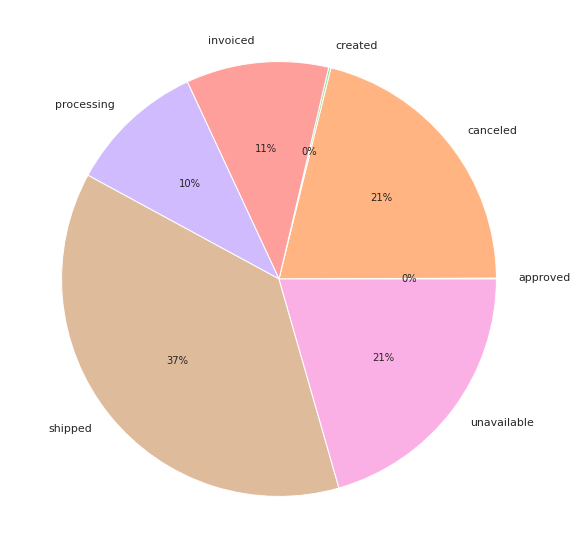

In [594]:
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(10,10))
plt.pie(orders_by_status.order_id,labels=orders_by_status.order_status, autopct='%.0f%%')
plt.show()

##### Conclusion:

1. 37% of items are still in a way to the customers. 
2. 21% are cancelled (the reasons can be different,for instance, customer may cancel the purchase or the company is not able to deliver the item due to logistics problems)
3. Also, 21% of items are not available (maybe due to high demand)
4. 11% of items are not paid for yet
5. 10% are still processing
6. And the rest are not material (5 items that are created and 2 items that are approved)

Therefore, 42%(canceled and not available) will not be delivered to customers for sure. And for the rest there is probability of being delivered

#####  Вывод:

1. 37 % - отгружены со склада
2. 21% - отменён (могут быть разные причины отмены заказа, например, клиент отменил покупку или же компания не может доставить покупку по разным причинам)
3. 21% недоступен (возможно из-за высокого спроса)
4. 11% - выставлен счёт
5. 10% - в процессе сборки заказа
6. И только 5 заказов созданы и 2 подтверждены (0%)

Согласно нашему анализу скорее всего 42% заказов так и не будут доставлены клиентам, так как они отменены и недоступны. Остальные заказы скорее всего дойдут до покупателя.

#### Задание 3

#### По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

In [595]:
df_goods = pd.merge(orders,items, on=['order_id'])  #merged two dfs into one
df_goods = df_goods[['order_id','customer_id','order_status','order_approved_at','order_item_id','product_id','seller_id','price','freight_value']]

The item is considered as purchased when the customer paid for it. 

Покупка считается совершенной, когда оплата заказа была подтверждена (order_approved_at)

In [596]:
# check the missing values
# проверяем отсутствующие данные 
df_goods.isnull().sum()

order_id              0
customer_id           0
order_status          0
order_approved_at    15
order_item_id         0
product_id            0
seller_id             0
price                 0
freight_value         0
dtype: int64

In [597]:
# remove missing values
# удаляем строки с отсутствующими данными
df_goods = df_goods.dropna()

In [598]:
# create the column with day names
# создаем колонку с названиями дней в неделе
df_goods['week_day'] = df_goods.order_approved_at.dt.day_name()

In [599]:
days= df_goods.groupby(['product_id','week_day'],as_index=False) \
                .agg({'order_status':'count'}) \
                .rename(columns={'order_status':'no_of_orders'}) \
                .sort_values('no_of_orders',ascending=False)

In [600]:
days.head()

,product_id,week_day,no_of_orders
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20152,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
41077,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,96
15933,422879e10f46682990de24d770e7f83d,Tuesday,89
41083,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,89


In [601]:
days.query('product_id=="aca2eb7d00ea1a7b8ebd4e68314663af"')

,product_id,week_day,no_of_orders
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
41077,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,96
41083,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,89
41081,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,69
41079,aca2eb7d00ea1a7b8ebd4e68314663af,Saturday,58
41078,aca2eb7d00ea1a7b8ebd4e68314663af,Monday,54
41080,aca2eb7d00ea1a7b8ebd4e68314663af,Sunday,42


In [602]:
# find the days in which the certain product is sold the most
#По каждому товару определяем, в какой день недели он чаще всего покупается
best_selling_days_by_products = df_goods.groupby('product_id',as_index =False) \
                                        .aggregate({'week_day':pd.Series.mode})

In [603]:
best_selling_days_by_products.head()

,product_id,week_day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


In [604]:
#check whether the data has been correctly presented (compare one product_id in df days and df best_selling_days_by_products)
# проверим, что верно сгруппировали данные (возьмем 1 product_id и проверим в какой день он чаще всего продавался в df days и df best_selling_days_by_products) )
best_selling_days_by_products.query('product_id=="aca2eb7d00ea1a7b8ebd4e68314663af"')

,product_id,week_day
22110,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday


#### Conclusion:

- We have identified best_selling_days_by_products above.


- Мы определили в какой день недели каждый товар чаще всего покупается (best_selling_days_by_products).

#### Задание 4

#### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?  Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 



In [605]:
# using the df with customer_unique_id from 1 and 2 tasks
# используем дата фрейм с уникальный идентификатор пользователя с задания 1 и 2
df_merged.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,not_delivered
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,05-2017,False
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,01-2018,False
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,05-2018,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,03-2018,False
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,07-2018,False


- Remove canceled, just created orders and NAN values in order_approved_at column, in order to find the customers who made the purchase.


- Убираем отмененные и только созданные заказы, а также отсутствующие данные в колонке order_approved_at, чтобы определить пользователей совершивших покупку.

In [606]:
made_purchase = df_merged.query('order_status not in ("canceled","created") & order_approved_at != "nan"')
made_purchase = made_purchase[['customer_id','customer_unique_id','order_id','order_status','order_approved_at']]

In [607]:
made_purchase.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09


In [608]:
#check that all null items were removed
#проверим, что удалили все отсутствующие данные
made_purchase.order_approved_at.isnull().sum()

0

In [609]:
# added the column payment_date
# добавим колонку payment_date
made_purchase['payment_date'] = made_purchase.order_approved_at.dt.to_period('M') 

In [610]:
# added the column days_in_month
# добавим колонку days_in_month
made_purchase['days_in_month'] = made_purchase.order_approved_at.dt.daysinmonth

In [611]:
made_purchase.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,payment_date,days_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,2017-05,31
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32,2018-01,31
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10,2018-05,31
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19,2018-03,31
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09,2018-07,31


In [612]:
purchases_in_month = made_purchase.groupby(['customer_unique_id','payment_date','days_in_month'],as_index=False) \
                                    .aggregate({'order_id':'count'}) \
                                    .sort_values('order_id',ascending = False) \
                                    .rename(columns = {'order_id':'no_of_purchases'})

In [613]:
purchases_in_month.head()

,customer_unique_id,payment_date,days_in_month,no_of_purchases
7274,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,31,6
68959,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,28,4
50309,83e7958a94bd7f74a9414d8782f87628,2017-01,31,4
61809,a239b8e2fbce33780f1f1912e2ee5275,2017-02,28,4
14391,25a560b9a6006157838aab1bdbd68624,2017-04,30,4


In [614]:
# calculate the average no of purchases made in a week
# считаем среднее количество покупок за неделю
purchases_in_month['purchases_in_week'] = purchases_in_month.no_of_purchases/purchases_in_month.days_in_month*7  

In [615]:
purchases_in_month.sort_values('purchases_in_week', ascending=False)

,customer_unique_id,payment_date,days_in_month,no_of_purchases,purchases_in_week
7274,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,31,6,1.354839
61809,a239b8e2fbce33780f1f1912e2ee5275,2017-02,28,4,1.000000
23794,3e43e6105506432c953e165fb2acf44c,2018-02,28,4,1.000000
68959,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,28,4,1.000000
14391,25a560b9a6006157838aab1bdbd68624,2017-04,30,4,0.933333
...,...,...,...,...,...
73548,c0db9d178b216ab153fcf56d6382f735,2017-08,31,1,0.225806
73557,c0e0c6e5b85080dbdf3f021b55edbb3e,2017-03,31,1,0.225806
73556,c0e0c0faeae91a736ee4c33bb0a24e16,2017-10,31,1,0.225806
73555,c0e0099353963aa2d4aeb0f79b564e1f,2017-10,31,1,0.225806


##### Conclusion:

##### Only 4 users made 1 and more purchases in a week in certain month in average. 

##### Только 4 пользователей в среднем сделали 1 или больше покупок в неделю в определенном месяце. Для того, чтобы посмотреть сколько в среднем покупок в неделю (по месяцам) совершает каждый пользователь смотрите таблицу выше.

### Задание 5

### Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

In [616]:
# take a look at the head
# посмотрим на дата фрейм
df_merged.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,not_delivered
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,05-2017,False
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,01-2018,False
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,05-2018,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,03-2018,False
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,07-2018,False


In [617]:
# delete the orders with statuses - canceled and created
# удалим заказы со статусами отменен и создан
df_merged_orders = df_merged.query('order_status not in ("canceled","created")')

In [618]:
df_merged_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,not_delivered
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,05-2017,False
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,01-2018,False
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,05-2018,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,03-2018,False
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,07-2018,False


In [619]:
# check whether there are any null values
# проверим на отсутствующие значения
df_merged_orders.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1228
order_delivered_customer_date    2341
order_estimated_delivery_date       0
order_purchase_date                 0
not_delivered                       0
dtype: int64

In [620]:
# modify data for cohort analysis
# изменим дата фрейм для когортного анализа (оставим нужные колонки)
df_cohort = df_merged_orders[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]

In [621]:
df_cohort.head()

,customer_unique_id,order_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30


In [622]:
# create an invoice month column
# создадим колонку с месяцем создания заказа
import datetime as dt

# function for month
# создадим функцию 
def get_month(x):
    return dt.datetime(x.year, x.month,1)

# apply the function
# применим фукцию
df_cohort['invoice_date'] = df_cohort['order_purchase_timestamp'].apply(get_month)
df_cohort.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,customer_unique_id,order_id,order_purchase_timestamp,invoice_date
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-01
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-01
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-01
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-01


In [623]:
# create a column index with the minimum invoice date or the first time the client was acquired
# создадим колонку с минимальной датой создания заказа (первый раз когда клиент совершил покупку)
df_cohort['cohort_date'] = df_cohort.groupby('customer_unique_id')['invoice_date'].transform('min')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [624]:
#check whether cohort_month was correctly recorded
# проверим, что по колонке cohort_month верно были отражены данные
df_cohort.query("customer_unique_id=='004288347e5e88a27ded2bb23747066c'")

,customer_unique_id,order_id,order_purchase_timestamp,invoice_date,cohort_date
20023,004288347e5e88a27ded2bb23747066c,a61d617fbe5bd006e40d3a0988fc844b,2017-07-27 14:13:03,2017-07-01,2017-07-01
22066,004288347e5e88a27ded2bb23747066c,08204559bebd39e09ee52dcb56d8faa2,2018-01-14 07:36:54,2018-01-01,2017-07-01


In [625]:
# create a date element function to get a series for substraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [626]:
#get date elements for cohort and invoice columns
_,invoice_month, invoice_year = get_date_elements(df_cohort, 'invoice_date')
_,cohort_month, cohort_year = get_date_elements(df_cohort, 'cohort_date')

In [627]:
#check the series
invoice_year

0        2017
1        2018
2        2018
3        2018
4        2018
         ... 
99436    2018
99437    2018
99438    2018
99439    2017
99440    2017
Name: invoice_date, Length: 98811, dtype: int64

In [628]:
# calculate cohort index
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
df_cohort['cohort_index'] = year_diff*12+month_diff
df_cohort.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,customer_unique_id,order_id,order_purchase_timestamp,invoice_date,cohort_date,cohort_index
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-01,2017-05-01,0
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-01,2018-01-01,0
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-01,2018-05-01,0
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-01,2018-03-01,0
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-01,2018-07-01,0


In [629]:
# count the customer_unique_id by grouping by cohort_date and cohort_index 
data_cohort =df_cohort.groupby(['cohort_date','cohort_index'],as_index=False)\
                        .aggregate({'customer_unique_id':pd.Series.nunique})

In [630]:
data_cohort.head()

,cohort_date,cohort_index,customer_unique_id
0,2016-09-01,0,2
1,2016-10-01,0,297
2,2016-10-01,6,1
3,2016-10-01,9,1
4,2016-10-01,11,1


In [631]:
# create a pivot table
pivot = data_cohort.pivot(index='cohort_date', columns='cohort_index',values='customer_unique_id')

In [632]:
pivot

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_date,,,,,,,,,,,,,,,,,,,,
2016-09-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,297.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,762.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02-01,1735.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03-01,2603.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04-01,2334.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN
2017-05-01,3571.0,17.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,10.0,9.0,12.0,9.0,1.0,7.0,8.0,NaN,NaN,NaN,NaN
2017-06-01,3126.0,14.0,11.0,13.0,8.0,12.0,11.0,7.0,4.0,7.0,10.0,10.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


Creating cohort heatmap

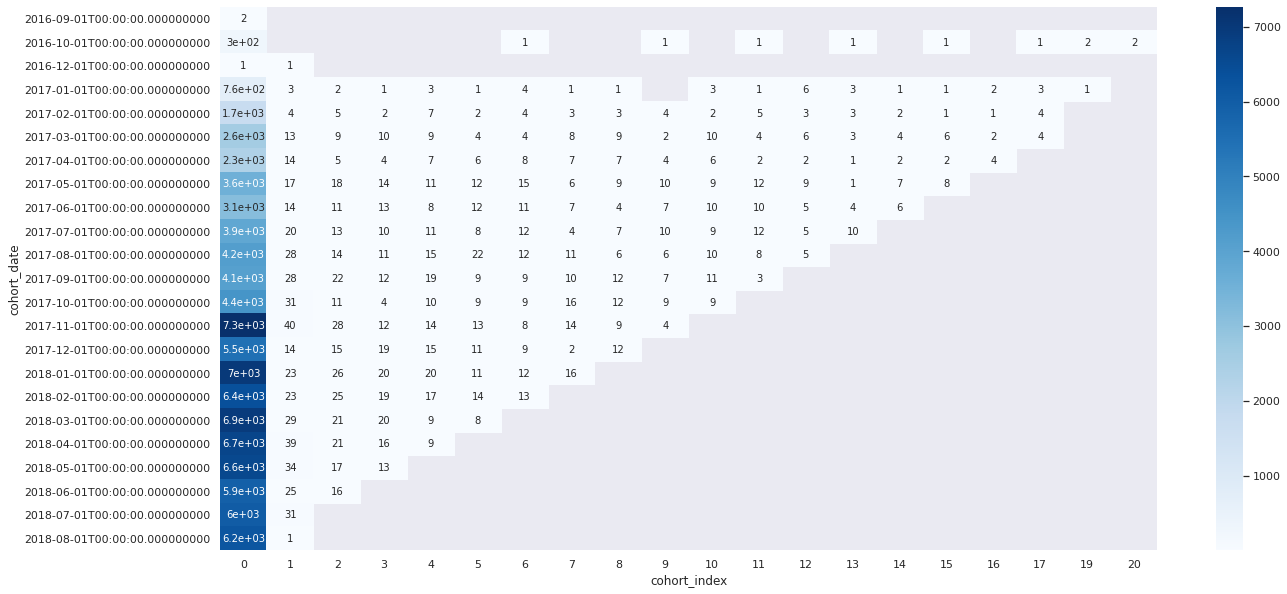

In [633]:
#change index
#pivot.index = pivot.index.strftime('%B %Y')
#visualise our results in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(pivot,annot=True, cmap='Blues')

In [634]:
#cohort table for percentage
retention = pivot.divide(pivot.iloc[:,0], axis=0)
retention

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_date,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,1.0,NaN,NaN,NaN,NaN,NaN,0.003367,NaN,NaN,0.003367,NaN,0.003367,NaN,0.003367,NaN,0.003367,NaN,0.003367,0.006734,0.006734
2016-12-01,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.003937,0.002625,0.001312,0.003937,0.001312,0.005249,0.001312,0.001312,NaN,0.003937,0.001312,0.007874,0.003937,0.001312,0.001312,0.002625,0.003937,0.001312,NaN
2017-02-01,1.0,0.002305,0.002882,0.001153,0.004035,0.001153,0.002305,0.001729,0.001729,0.002305,0.001153,0.002882,0.001729,0.001729,0.001153,0.000576,0.000576,0.002305,NaN,NaN
2017-03-01,1.0,0.004994,0.003458,0.003842,0.003458,0.001537,0.001537,0.003073,0.003458,0.000768,0.003842,0.001537,0.002305,0.001153,0.001537,0.002305,0.000768,0.001537,NaN,NaN
2017-04-01,1.0,0.005998,0.002142,0.001714,0.002999,0.002571,0.003428,0.002999,0.002999,0.001714,0.002571,0.000857,0.000857,0.000428,0.000857,0.000857,0.001714,NaN,NaN,NaN
2017-05-01,1.0,0.004761,0.005041,0.003920,0.003080,0.003360,0.004201,0.001680,0.002520,0.002800,0.002520,0.003360,0.002520,0.000280,0.001960,0.002240,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.004479,0.003519,0.004159,0.002559,0.003839,0.003519,0.002239,0.001280,0.002239,0.003199,0.003199,0.001599,0.001280,0.001919,NaN,NaN,NaN,NaN,NaN


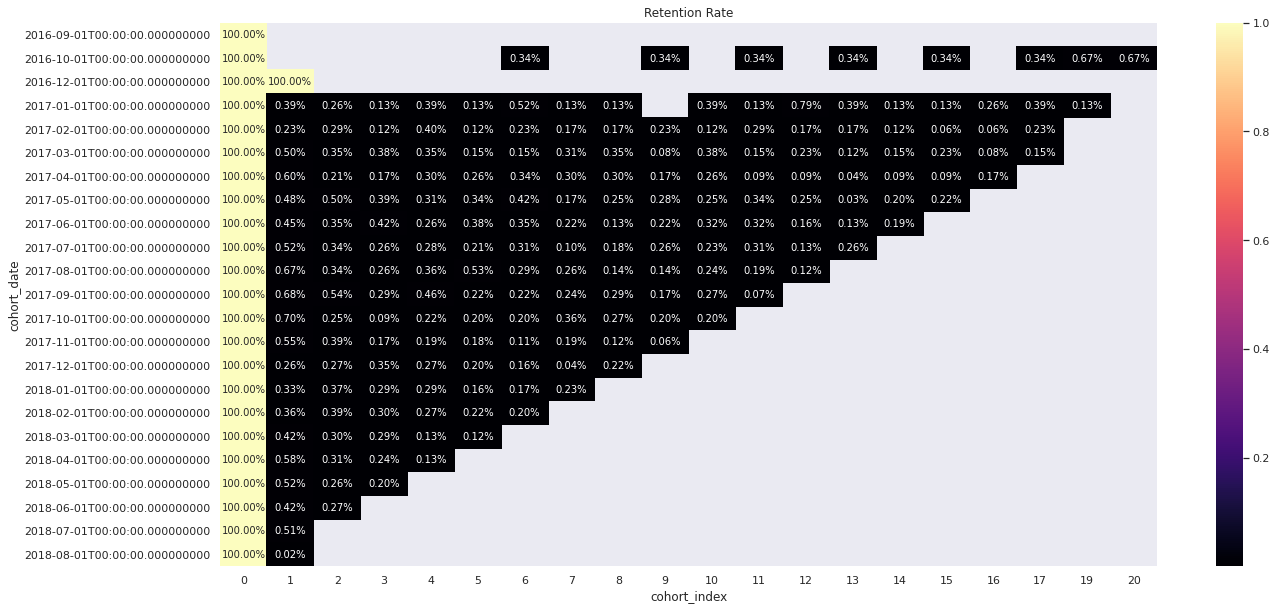

In [635]:
#create a percentage visual
plt.figure(figsize=(21,10))
plt.title('Retention Rate')
sns.heatmap(retention,annot=True,fmt= '.2%', cmap='magma')

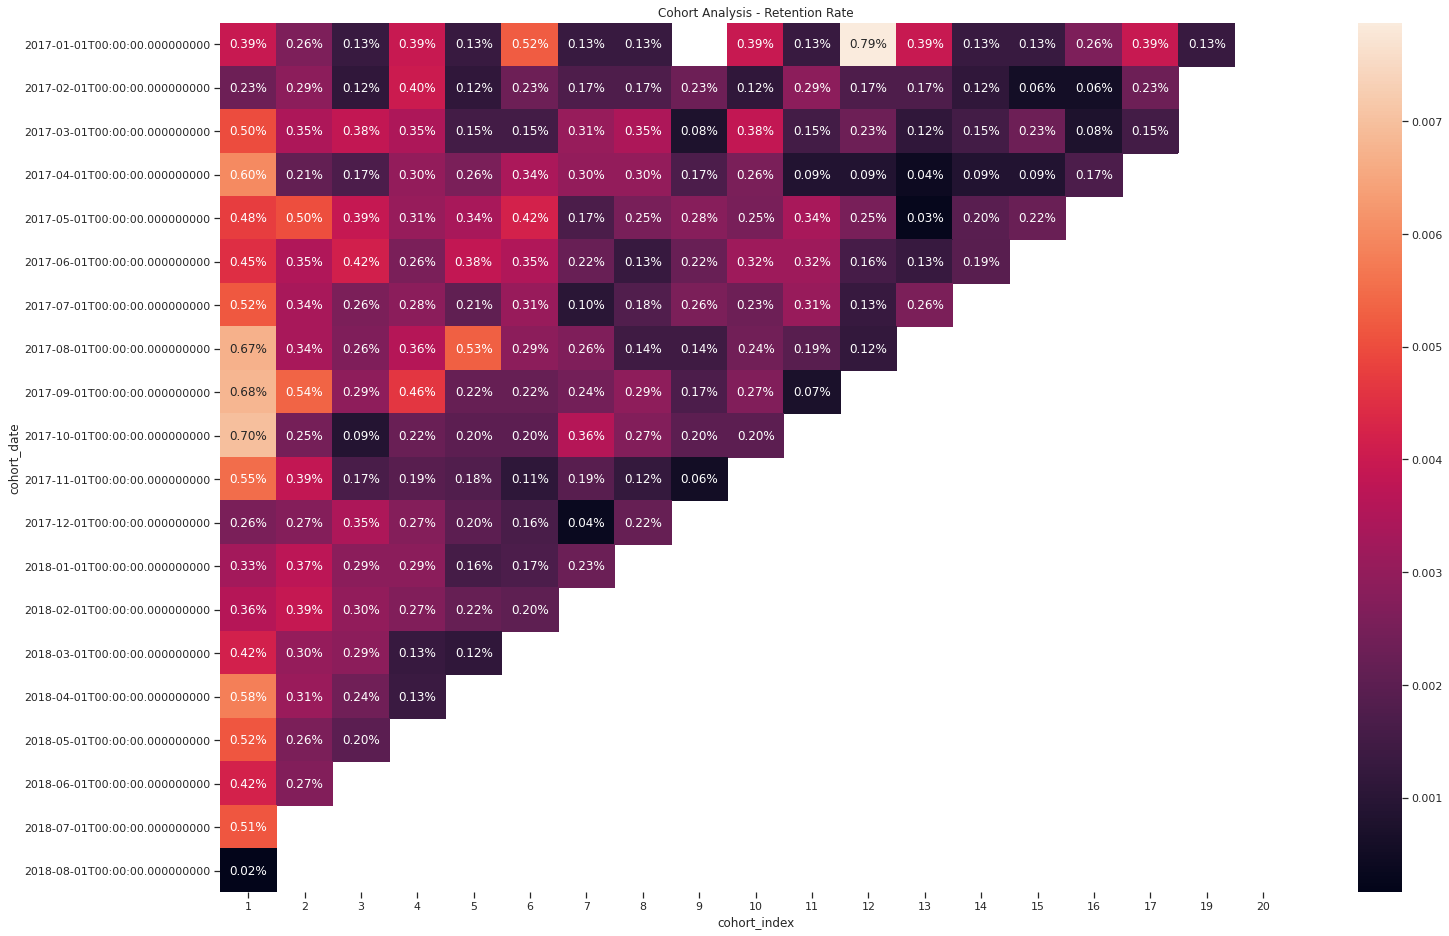

In [636]:
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(retention.iloc[3:,1:], mask=retention.iloc[3:,1:].isnull(), annot=True, fmt='.2%');

##### Conclusion:

##### The highest retention rate in 3rd month for the period of January to December is 2017-06

##### Cамым высокий retention на 3й месяц  в период с января по декабрь  - 2017-06


### Задание 6

#### Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. (35 баллов)



#### Prepare the data

In [637]:
# Let's consider only orders that have been delivered
# Рассмотрим только те заказы, которые были доставлены
df_orders = orders.query('order_status=="delivered"') 

In [638]:
# leave only necessary columns
# оставим только нужные колонки
df_orders = df_orders[['order_id','customer_id','order_purchase_timestamp']] 

In [639]:
# join two dfs in order to get customer_unique_id column
# соединим 2 дата фрейма, чтобы увидеть колонку customer_unique_id 
df_customers = df_orders.merge(customers[['customer_id','customer_unique_id']], on='customer_id')

In [640]:
# calculate the total_price
# посчитаем итоговую сумму
items_unique = items.groupby('order_id',as_index = False) \
                    .aggregate({'price':'sum'}) \
                    .rename(columns = {'price':'total_price'})

In [641]:
#join two dfs in order to get price column
# соединим 2 дата фрейма, чтобы увидеть колонку price
df_items = df_customers.merge(items_unique[['order_id','total_price']], on='order_id')

In [642]:
# prepare the final data
# подготовим финальный дата фрейм
rfm_segmentation = df_items[['customer_unique_id','order_id','order_purchase_timestamp','total_price']]

In [643]:
rfm_segmentation.head()

,customer_unique_id,order_id,order_purchase_timestamp,total_price
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90


In [644]:
# check if there is any null values
# проверим если есть пропущенные значения
rfm_segmentation.isnull().sum()

customer_unique_id          0
order_id                    0
order_purchase_timestamp    0
total_price                 0
dtype: int64

In [645]:
# What is the time frame of the data?
# проверим временной интервал дата фрейма
print('Orders from {} to {}'.format(rfm_segmentation['order_purchase_timestamp'].min(),
                                    rfm_segmentation['order_purchase_timestamp'].max()))


Orders from 2016-09-15 12:16:38 to 2018-08-29 15:00:37


#### Calculating Recency, frequency and monetary

In [646]:
rfm_segmentation = rfm_segmentation.groupby('customer_unique_id',as_index=False) \
                                    .aggregate(recency=('order_purchase_timestamp','max'),
                                                frequency=('customer_unique_id','count'),
                                                monetary=('total_price','sum')) 

In [647]:
rfm_segmentation

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00
...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1,1570.00
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,64.89
93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,89.90
93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,115.00


In [648]:
#Here we are calculating recency for customers who had made a purchase with a company.
recent_date = rfm_segmentation['recency'].max()
recent_date

Timestamp('2018-08-29 15:00:37')

In [649]:
rfm_segmentation.recency = (recent_date - rfm_segmentation.recency).dt.days

In [650]:
rfm_segmentation.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,536,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00


In [651]:
#Check the characteristics of recency, frequency and monetary
rfm_segmentation.describe()

,recency,frequency,monetary
count,93358.000000,93358.000000,93358.000000
mean,236.941773,1.033420,141.621480
std,152.591453,0.209097,215.694014
min,0.000000,1.000000,0.850000
25%,113.000000,1.000000,47.650000
50%,218.000000,1.000000,89.730000
75%,345.000000,1.000000,154.737500
max,713.000000,15.000000,13440.000000


In [652]:
quantiles = rfm_segmentation[['recency', 'frequency', 'monetary']].quantile([.2, .6, .8]).to_dict()
quantiles

{'recency': {0.2: 91.0, 0.6: 267.0, 0.8: 381.0},
 'frequency': {0.2: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.6: 109.9, 0.8: 179.9}}

### Recency

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


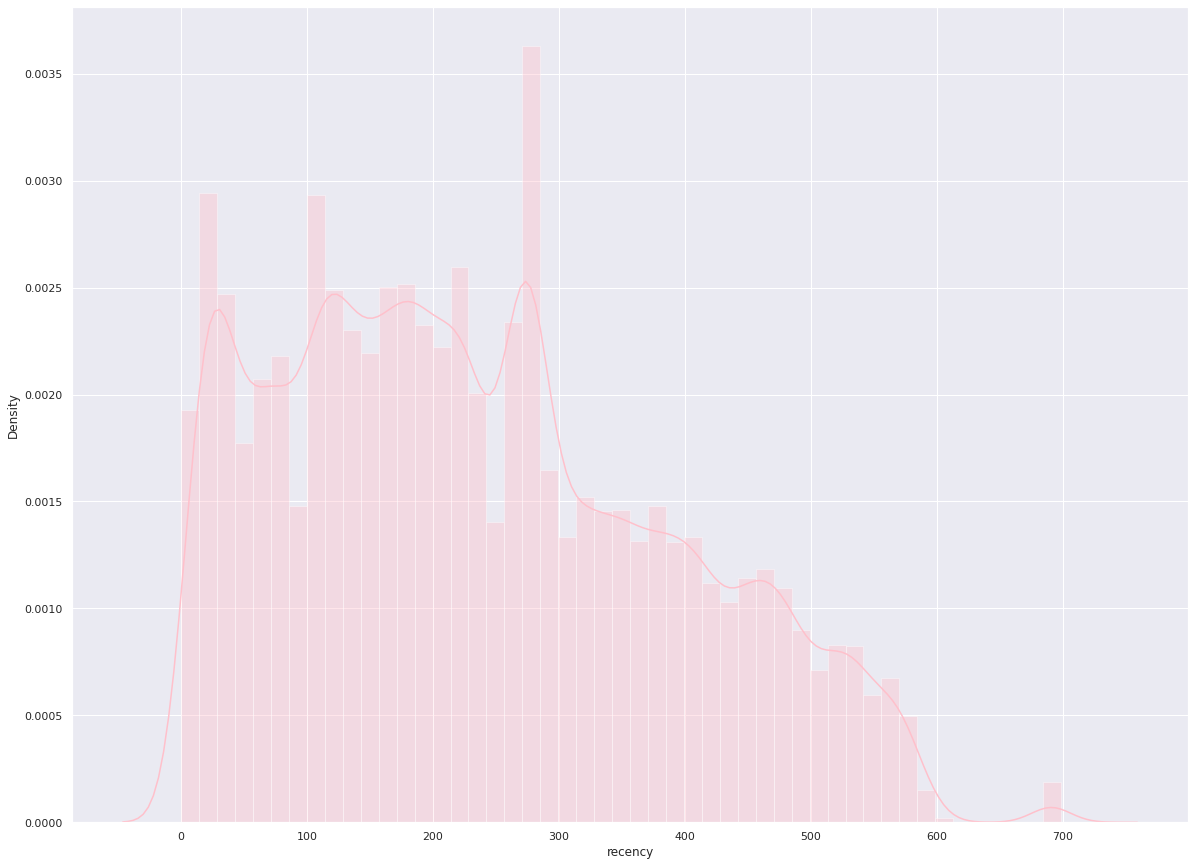

In [653]:
#build the distplot for recency
sns.set(rc={'figure.figsize':(20,15)})
sns.distplot(rfm_segmentation.recency,color="pink")

We can make the scale by setting ranges based on expected behaviour. As we are not aware what kind of products the company is selling, we are not able precisely identify the behaviour of clients according to the industry we are operating in. 

In this case, the following scale is going to be used (please refer to the quantile calculated above):

1: 0 - 90 days (approximately 3 months, bought relatively recently)

2: 91- 279 days (approximately 9 months)

3: 280-1000 days


Так как мы не знаем, что именно продает компания, мы не сможем точно определить поведение клиентов, которое присуще определенной индустрие. 
Поэтому мы выделим следующие 3 сегмента:

1: 0 - 90 дней (примерно 3 месяца)

2: 91- 279 days (примерно 9 месяцев)

3: 280-1000 days


In [654]:
def r(recency):
    if recency <= 90:
        return 3
    elif recency >= 280:
        return 1
    else:
        return 2

rfm_segmentation['r'] = rfm_segmentation.recency.apply(r)

In [655]:
rfm_segmentation.head()

,customer_unique_id,recency,frequency,monetary,r
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2
2,0000f46a3911fa3c0805444483337064,536,1,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00,1


#### Frequency

In [656]:
rfm_segmentation.frequency.unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 15])

In [657]:
frequency_count = rfm_segmentation.groupby('frequency',as_index=False) \
                .aggregate({'customer_unique_id':'count'}) \
                .rename(columns={'customer_unique_id':'no_of_customers'})

In [658]:
frequency_count

,frequency,no_of_customers
0,1,90557
1,2,2573
2,3,181
3,4,28
4,5,9
5,6,5
6,7,3
7,9,1
8,15,1


It's obvious that 97% of purchases were made only once. 
In this case, the following scale is going to be used:

1: only 1 purchase. Most probably it's the new client or the client who were not satisfied with the quality of the product.

2: 2 purchases. The group of customers who has the potential to become loyal clients.

3: 3 and more purchases. Loyal customers.

Очевидно, что 97% покупок были сделаны только 1 раз. Поэтому мы выделим следующие 3 сегмента:
1: только 1 покупка. Возможно данные покупки были сделаны новыми клиентами или же клиентами, которые в последствии не были удовлетворены качеством продукции.

2: 2 покупки. Покупатели, которые имеют потенциал стать постоянными клиентами.

3: 3 и более покупки. Постоянные клиенты.

In [659]:
def f(frequency):
    if frequency == 1:
        return 1
    elif frequency == 2:
        return 2
    else:
        return 3

rfm_segmentation['f'] = rfm_segmentation.frequency.apply(f)

In [660]:
rfm_segmentation.head()

,customer_unique_id,recency,frequency,monetary,r,f
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,1
2,0000f46a3911fa3c0805444483337064,536,1,69.00,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,1,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00,1,1


#### Monetary

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


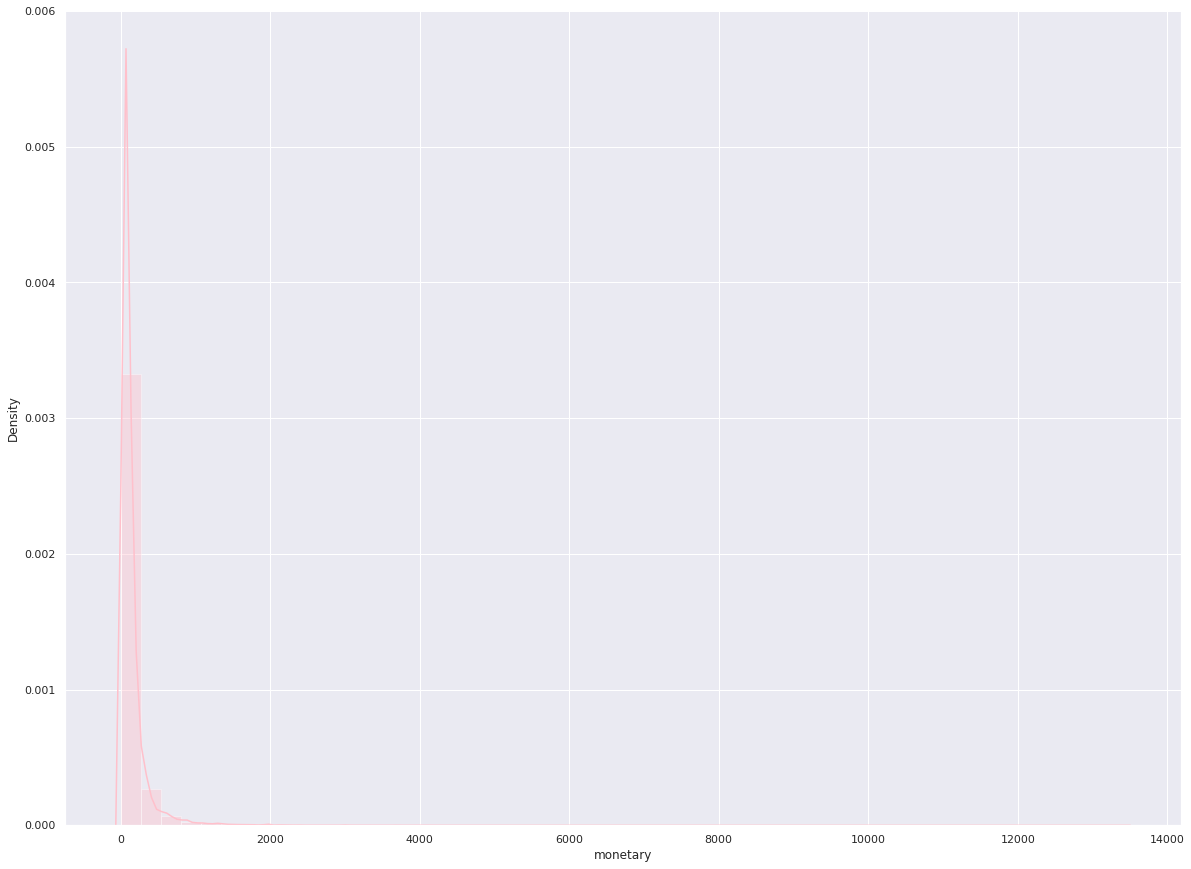

In [661]:
#build the distplot for monetary
sns.set(rc={'figure.figsize':(20,15)})
sns.distplot(rfm_segmentation.monetary,color="pink")

Let's consider the purchases that are less than 600. Distplot shows that the most of purchases were made for less than 100. 

Please refer to distplot below.

Давайте рассмотрим покупки меньше 600. График ниже показывает, что большая часть покупок была сделана за сумму меньше, чем 100.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


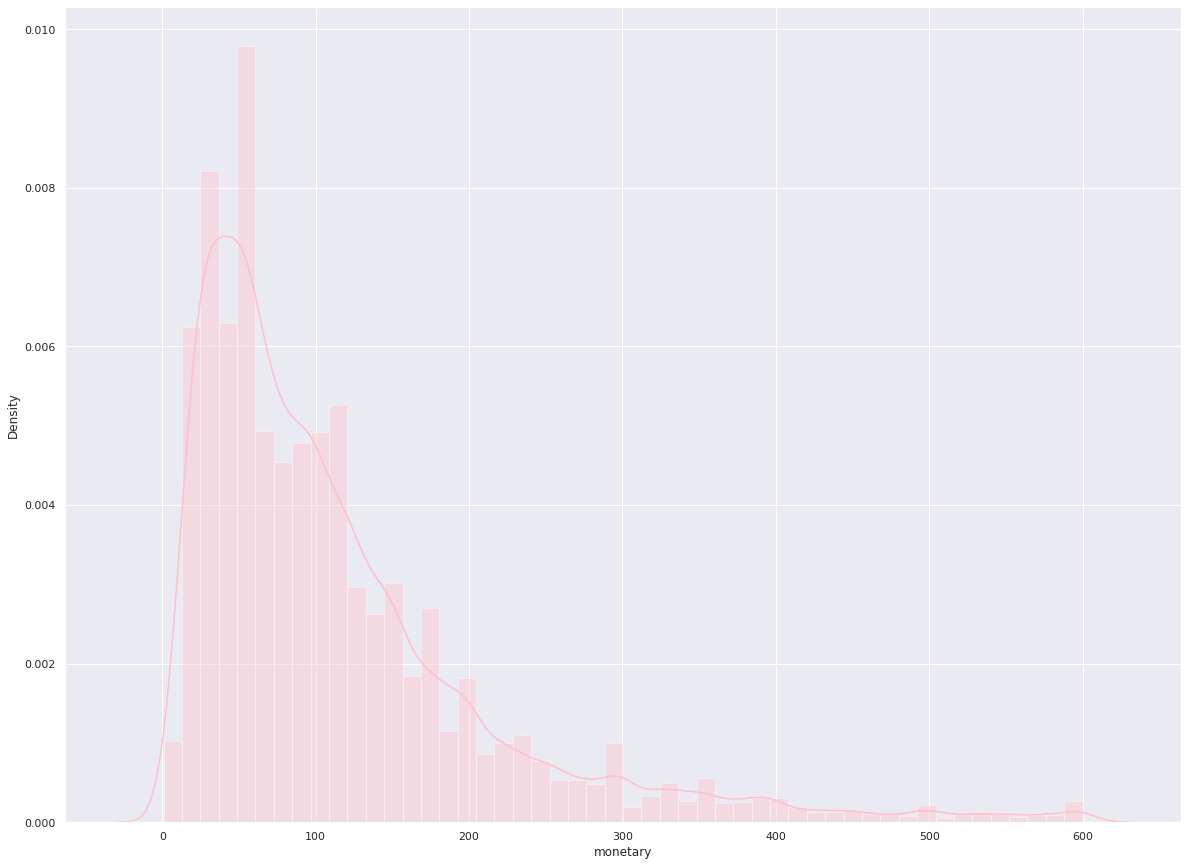

In [662]:
sns.set(rc={'figure.figsize':(20,15)})
sns.distplot(rfm_segmentation.query('monetary<600').monetary,color="pink")

As there is not a lot of information provided of the products and their price range, let's identify the groups based on our judgement. 
In this case, the following scale is going to be used:

1: 0 - 155 (155 is the value of 75th percentile)

2: 156 - 500

3: above 500

Так как у нас не много информации по поводу самого продукта и его ценообразования, мы выделим следующие 3 сегмента, согласно нашему анализу:

1: 0 - 155 (155 - 75 персентиль)

2: 156 - 500

3: свыше 500

In [663]:
def m(monetary):
    if monetary <= 155:
        return 1
    elif monetary > 500:
        return 3
    else:
        return 2

rfm_segmentation['m'] = rfm_segmentation.monetary.apply(m)

In [664]:
rfm_segmentation

,customer_unique_id,recency,frequency,monetary,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,2,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,1,1
2,0000f46a3911fa3c0805444483337064,536,1,69.00,1,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00,1,1,2
...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,1570.00,1,1,3
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,64.89,2,1,1
93355,ffff371b4d645b6ecea244b27531430a,567,1,89.90,1,1,1
93356,ffff5962728ec6157033ef9805bacc48,118,1,115.00,2,1,1


#### Get customers segments from RFM score

In [665]:
rfm_segmentation['rfm_score'] = rfm_segmentation['r'].map(str) + rfm_segmentation['f'].map(str) + rfm_segmentation['m'].map(str)

In [666]:
rfm_segmentation

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,2,1,1,211
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,536,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00,1,1,2,112
...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,1570.00,1,1,3,113
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,64.89,2,1,1,211
93355,ffff371b4d645b6ecea244b27531430a,567,1,89.90,1,1,1,111
93356,ffff5962728ec6157033ef9805bacc48,118,1,115.00,2,1,1,211


In [667]:
rfm_segmentation.groupby('rfm_score',as_index=False).agg(quantity = ('rfm_score','count'),
                              recency = ('recency','mean'),
                              frequency = ('frequency','mean'),
                              monetary = ('monetary','mean')).round(1)

,rfm_score,quantity,recency,frequency,monetary
0,111,24170,410.5,1.0,69.3
1,112,6488,411.2,1.0,249.4
2,113,1261,407.5,1.0,958.7
3,121,374,399.3,2.0,95.5
4,122,356,393.4,2.0,268.6
5,123,64,406.9,2.0,918.1
6,131,21,446.9,3.2,96.8
7,132,30,390.1,3.1,303.6
8,133,13,353.0,3.2,844.5
9,211,31098,187.5,1.0,71.3


In [668]:
segt_map = {
    r'[1][1-2]': 'hibernating',  
    r'13': 'need attention',
    r'[2][1-2]': 'about to sleep',
    r'23': 'promising',
    r'[3][1-2]': 'new customers',
    r'33': 'loyal customers',
    }

rfm_segmentation['segment'] = rfm_segmentation['r'].map(str) + rfm_segmentation['f'].map(str)
rfm_segmentation['segment'] = rfm_segmentation['segment'].replace(segt_map, regex=True)
rfm_segmentation

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,2,1,1,211,about to sleep
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,1,1,211,about to sleep
2,0000f46a3911fa3c0805444483337064,536,1,69.00,1,1,1,111,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,1,1,1,111,hibernating
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00,1,1,2,112,hibernating
...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,1570.00,1,1,3,113,hibernating
93354,fffea47cd6d3cc0a88bd621562a9d061,261,1,64.89,2,1,1,211,about to sleep
93355,ffff371b4d645b6ecea244b27531430a,567,1,89.90,1,1,1,111,hibernating
93356,ffff5962728ec6157033ef9805bacc48,118,1,115.00,2,1,1,211,about to sleep


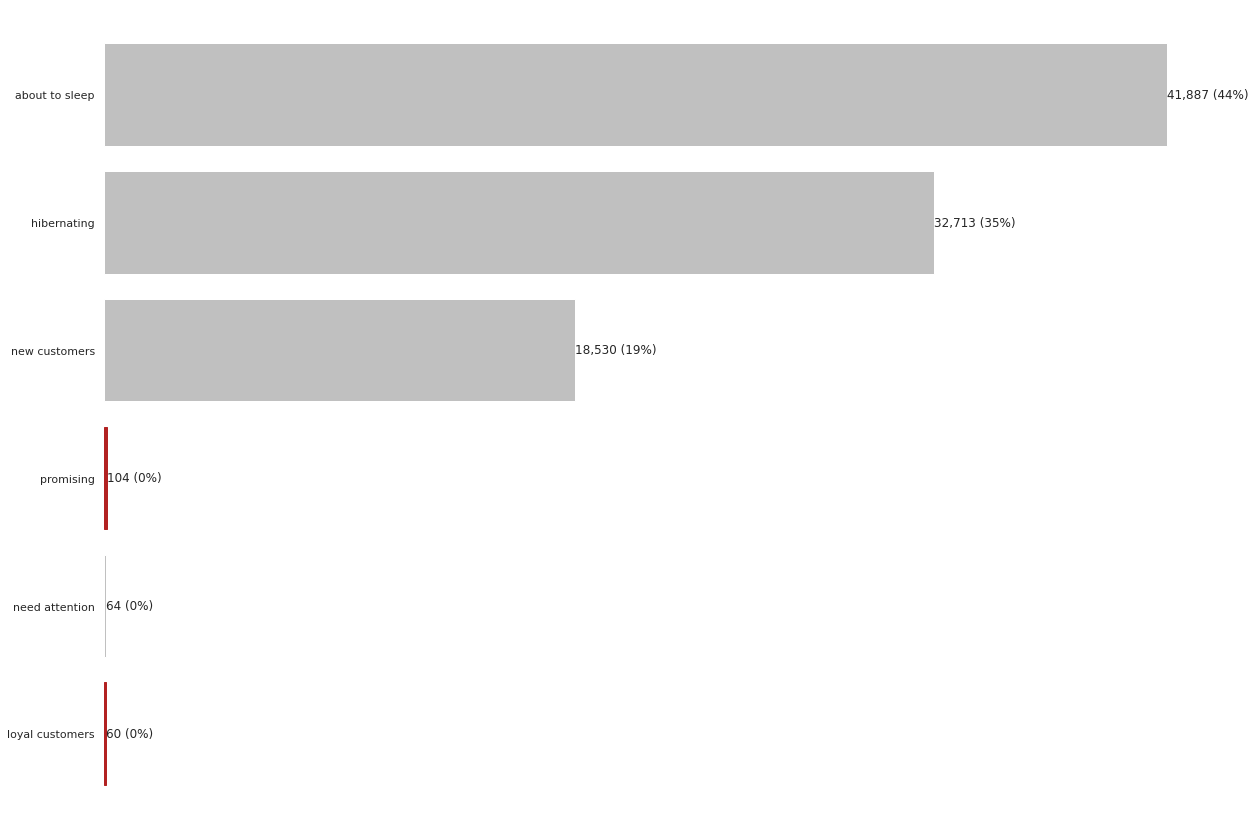

In [669]:
# count the number of customers in each segment
segments_counts = rfm_segmentation['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['promising','loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

##### Conclusion:

#### It's obvious that the company does not have much loyal customers and won't be able to survive without the new customers. On the other side, the company still has 44% of 'about to sleep' customers, therefore the entity needs to prepare, for instance some campaign, in order to 'wake up' such clients. Also, the company needs to pay attention to 'promising' and 'need attention' clients.

#### Очевидно, что у компании не так много постоянных покупателей и возможно бизнес не сможет успешно оперировать в будущем без новых клиентов. С другой стороны у компании имеется 44% 'засыпающих клиентов', поэтому в случае какой-либо рекламной кампании есть вероятность разбудить данных покуапателей. Также, бизнесу стоит проанализировать требующих внимание и подающих надежду клиентов.